In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV test data separetly into a DataFrame
data1 = pd.read_csv('results/2_palm_aigenerated_13_oneshot_experiment_1691494538419.csv')
data2 = pd.read_csv('results/2_palm_aigenerated_13_oneshot_experiment_1691494538419.csv')
# Concatenate the two test data
df = pd.concat([data1, data2], ignore_index=True)
df

,llm_model,temperature,system_prompt,user_prompt,score
0,google/palm/chat-bison,0,aigenerated_13_oneshot.txt,.DS_Store - 0,2.0
1,google/palm/chat-bison,0,aigenerated_13_oneshot.txt,CONVERT_TEXT_TO_SPEECH.txt - 0,3.0
2,google/palm/chat-bison,0,aigenerated_13_oneshot.txt,CONVERT_TEXT_TO_SPEECH.txt - 1,3.0
3,google/palm/chat-bison,0,aigenerated_13_oneshot.txt,CONVERT_TEXT_TO_SPEECH.txt - 2,3.0
4,google/palm/chat-bison,0,aigenerated_13_oneshot.txt,CONVERT_TEXT_TO_SPEECH.txt - 3,1.0
...,...,...,...,...,...
637,google/palm/chat-bison,0,aigenerated_13_oneshot.txt,SEND_EMAIL.txt - 15,3.0
638,google/palm/chat-bison,0,aigenerated_13_oneshot.txt,SEND_EMAIL.txt - 16,1.0
639,google/palm/chat-bison,0,aigenerated_13_oneshot.txt,SEND_EMAIL.txt - 17,3.0
640,google/palm/chat-bison,0,aigenerated_13_oneshot.txt,SEND_EMAIL.txt - 18,3.0


In [11]:
data1.head

<bound method NDFrame.head of                   llm_model  temperature               system_prompt   
0    google/palm/chat-bison            0  aigenerated_13_oneshot.txt  \
1    google/palm/chat-bison            0  aigenerated_13_oneshot.txt   
2    google/palm/chat-bison            0  aigenerated_13_oneshot.txt   
3    google/palm/chat-bison            0  aigenerated_13_oneshot.txt   
4    google/palm/chat-bison            0  aigenerated_13_oneshot.txt   
..                      ...          ...                         ...   
316  google/palm/chat-bison            0  aigenerated_13_oneshot.txt   
317  google/palm/chat-bison            0  aigenerated_13_oneshot.txt   
318  google/palm/chat-bison            0  aigenerated_13_oneshot.txt   
319  google/palm/chat-bison            0  aigenerated_13_oneshot.txt   
320  google/palm/chat-bison            0  aigenerated_13_oneshot.txt   

                        user_prompt  score  
0                     .DS_Store - 0    2.0  
1    CONVERT_TE

In [12]:
data2.head

<bound method NDFrame.head of                   llm_model  temperature               system_prompt   
0    google/palm/chat-bison            0  aigenerated_13_oneshot.txt  \
1    google/palm/chat-bison            0  aigenerated_13_oneshot.txt   
2    google/palm/chat-bison            0  aigenerated_13_oneshot.txt   
3    google/palm/chat-bison            0  aigenerated_13_oneshot.txt   
4    google/palm/chat-bison            0  aigenerated_13_oneshot.txt   
..                      ...          ...                         ...   
316  google/palm/chat-bison            0  aigenerated_13_oneshot.txt   
317  google/palm/chat-bison            0  aigenerated_13_oneshot.txt   
318  google/palm/chat-bison            0  aigenerated_13_oneshot.txt   
319  google/palm/chat-bison            0  aigenerated_13_oneshot.txt   
320  google/palm/chat-bison            0  aigenerated_13_oneshot.txt   

                        user_prompt  score  
0                     .DS_Store - 0    2.0  
1    CONVERT_TE

In [13]:
# filter and clean the data by excluding unwanted columns
df['user_prompt'] = df['user_prompt'].str.split('.').str[0]
filtered_df = df[['user_prompt', 'score']]
filtered_df

,user_prompt,score
0,,2.0
1,CONVERT_TEXT_TO_SPEECH,3.0
2,CONVERT_TEXT_TO_SPEECH,3.0
3,CONVERT_TEXT_TO_SPEECH,3.0
4,CONVERT_TEXT_TO_SPEECH,1.0
...,...,...
637,SEND_EMAIL,3.0
638,SEND_EMAIL,1.0
639,SEND_EMAIL,3.0
640,SEND_EMAIL,3.0


In [14]:
# Identify the unique scores
unique_scores = [0, 1, 2, 3]  # the score is to confusion matrix as TP=3, FP=2, FN=1 and TN=0.

# Count the occurrences of each score for each user_prompt
summary_aigen13_zeroshot = df.groupby('user_prompt')['score'].value_counts().unstack()

# Ensure all scores are represented in the columns, filling with 0 where necessary
summary_aigen13_zeroshot = summary_aigen13_zeroshot.reindex(columns=unique_scores).fillna(0)

# Rename the columns as desired (cnfusion matrix)
summary_aigen13_zeroshot.columns = ['TN', 'FN', 'FP', 'TP']
summary_aigen13_zeroshot


,TN,FN,FP,TP
user_prompt,,,,
,0.0,0.0,2.0,0.0
CONVERT_TEXT_TO_SPEECH,0.0,22.0,0.0,18.0
CREATE_CALENDAR_EVENT,0.0,2.0,20.0,18.0
CREATE_REMINDER,0.0,12.0,10.0,18.0
GENERATE_IMAGE,0.0,28.0,0.0,12.0
GET_CALENDAR_EVENTS,0.0,40.0,0.0,0.0
GET_CURRENT_DATE_AND_TIME,0.0,0.0,36.0,4.0
GET_CURRENT_STOCK_PRICE,0.0,2.0,36.0,2.0
GET_NEWS,0.0,28.0,6.0,6.0


In [15]:
# Add a row for the cumulative sum of each column
sum_row = summary_aigen13_zeroshot.sum(numeric_only=True)
df_sum = pd.DataFrame([sum_row], index=["Cumulative"])
summary_aigen13_zeroshot = pd.concat([summary_aigen13_zeroshot, df_sum])
summary_aigen13_zeroshot.index.name = "APIs"

In [16]:
# Calculate Precision, Recall, and F1 Score
summary_aigen13_zeroshot['Precision'] = summary_aigen13_zeroshot['TP'] / (summary_aigen13_zeroshot['TP'] + summary_aigen13_zeroshot['FP'])
summary_aigen13_zeroshot['Recall'] = summary_aigen13_zeroshot['TP'] / (summary_aigen13_zeroshot['TP'] + summary_aigen13_zeroshot['FN'])
summary_aigen13_zeroshot['F1 Score'] = 2 * (summary_aigen13_zeroshot['Precision'] * summary_aigen13_zeroshot['Recall']) / (summary_aigen13_zeroshot['Precision'] + summary_aigen13_zeroshot['Recall'])

# Round to 2 decimal places
summary_aigen13_zeroshot['Precision'] = summary_aigen13_zeroshot['Precision'].round(2)
summary_aigen13_zeroshot['Recall'] = summary_aigen13_zeroshot['Recall'].round(2)
summary_aigen13_zeroshot['F1 Score'] = summary_aigen13_zeroshot['F1 Score'].round(2)

# Handle possible NaN values (caused by divisions by zero)
summary_aigen13_zeroshot.fillna(0, inplace=True)

# Stire the results summary in a csv file
summary_aigen13_zeroshot.to_csv('summary_palm_using_aigen13_zeroshot.csv', index=True)

print(summary_aigen13_zeroshot)

                              TN     FN     FP     TP  Precision  Recall   
APIs                                                                       
                             0.0    0.0    2.0    0.0       0.00    0.00  \
CONVERT_TEXT_TO_SPEECH       0.0   22.0    0.0   18.0       1.00    0.45   
CREATE_CALENDAR_EVENT        0.0    2.0   20.0   18.0       0.47    0.90   
CREATE_REMINDER              0.0   12.0   10.0   18.0       0.64    0.60   
GENERATE_IMAGE               0.0   28.0    0.0   12.0       1.00    0.30   
GET_CALENDAR_EVENTS          0.0   40.0    0.0    0.0       0.00    0.00   
GET_CURRENT_DATE_AND_TIME    0.0    0.0   36.0    4.0       0.10    1.00   
GET_CURRENT_STOCK_PRICE      0.0    2.0   36.0    2.0       0.05    0.50   
GET_NEWS                     0.0   28.0    6.0    6.0       0.50    0.18   
GET_WEATHER                  0.0   10.0    2.0   28.0       0.93    0.74   
NOT_AVAILABLE              230.0    0.0    4.0    4.0       0.50    1.00   
SEND_EMAIL  

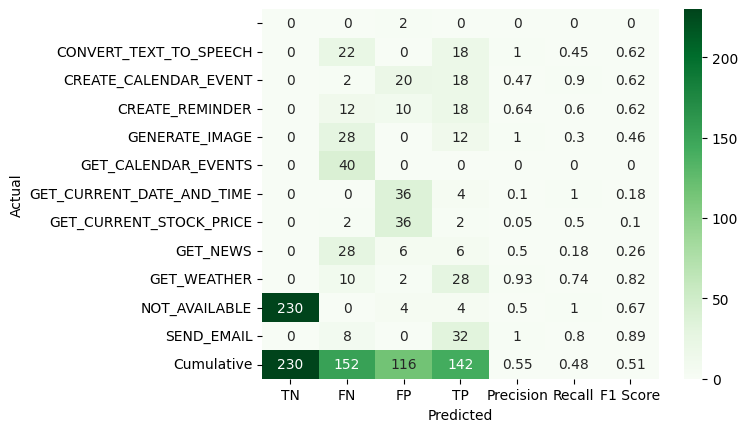

In [17]:
# Plot the confusion matrix
sns.heatmap(summary_aigen13_zeroshot, annot=True, cmap='Greens', fmt='g'), plt.xlabel('Predicted'), plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [18]:
# Generate the DataFrame to LaTeX format so that it can be copied and pasted into our thesis
# Formatting TN, FN, FP, and TP columns to 0 decimal places
for col in ['TN', 'FN', 'FP', 'TP']:
    summary_aigen13_zeroshot[col] = summary_aigen13_zeroshot[col].astype(int)

# Formatting the 'Precision', 'Recall', and 'F1 Score' columns to 2 decimal places
for col in ['Precision', 'Recall', 'F1 Score']:
    summary_aigen13_zeroshot[col] = summary_aigen13_zeroshot[col].round(2)

# Convert the DataFrame to LaTeX
latex_code = summary_aigen13_zeroshot.to_latex(float_format="%.2f")
print(latex_code)

\begin{tabular}{lrrrrrrr}
\toprule
 & TN & FN & FP & TP & Precision & Recall & F1 Score \\
APIs &  &  &  &  &  &  &  \\
\midrule
 & 0 & 0 & 2 & 0 & 0.00 & 0.00 & 0.00 \\
CONVERT_TEXT_TO_SPEECH & 0 & 22 & 0 & 18 & 1.00 & 0.45 & 0.62 \\
CREATE_CALENDAR_EVENT & 0 & 2 & 20 & 18 & 0.47 & 0.90 & 0.62 \\
CREATE_REMINDER & 0 & 12 & 10 & 18 & 0.64 & 0.60 & 0.62 \\
GENERATE_IMAGE & 0 & 28 & 0 & 12 & 1.00 & 0.30 & 0.46 \\
GET_CALENDAR_EVENTS & 0 & 40 & 0 & 0 & 0.00 & 0.00 & 0.00 \\
GET_CURRENT_DATE_AND_TIME & 0 & 0 & 36 & 4 & 0.10 & 1.00 & 0.18 \\
GET_CURRENT_STOCK_PRICE & 0 & 2 & 36 & 2 & 0.05 & 0.50 & 0.10 \\
GET_NEWS & 0 & 28 & 6 & 6 & 0.50 & 0.18 & 0.26 \\
GET_WEATHER & 0 & 10 & 2 & 28 & 0.93 & 0.74 & 0.82 \\
NOT_AVAILABLE & 230 & 0 & 4 & 4 & 0.50 & 1.00 & 0.67 \\
SEND_EMAIL & 0 & 8 & 0 & 32 & 1.00 & 0.80 & 0.89 \\
Cumulative & 230 & 152 & 116 & 142 & 0.55 & 0.48 & 0.51 \\
\bottomrule
\end{tabular}

